In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Importing CSVs

In [3]:
#American Airlines Group
A1G = pd.read_csv("../CSVs/A1G.F.csv")

In [4]:
#Boeing 
BA = pd.read_csv("../CSVs/BA.csv")

In [5]:
#CSX Rail
CSX = pd.read_csv("../CSVs/CSX.csv")

In [6]:
#General Motors
GM = pd.read_csv("../CSVs/GM.csv")

In [7]:
#Cleaned and Natual language sentiment evaluated tweets
Tweets = pd.read_csv("../TweetSentiment.csv")

In [8]:
print(f'A1G:')
print(A1G.head())
A1G = A1G.dropna()
print(A1G.shape)

A1G:
         Date       Open       High        Low      Close  Adj Close  Volume
0  2018-01-02  43.400002  43.400002  43.000000  43.400002  42.144642   420.0
1  2018-01-03  43.799999  43.799999  43.400002  43.400002  42.144642   125.0
2  2018-01-04  43.400002  43.799999  43.400002  43.400002  42.144642    72.0
3  2018-01-05  43.400002  44.000000  43.400002  43.599998  42.338856    60.0
4  2018-01-08  43.799999  43.799999  43.599998  43.599998  42.338856     0.0
(502, 7)


In [9]:
print(f'BA:')
print(BA.head())
BA = BA.dropna()
print(BA.shape)

BA:
         Date        Open        High         Low       Close   Adj Close  \
0  2018-01-02  295.750000  296.989990  295.399994  296.839996  284.569489   
1  2018-01-03  295.940002  298.500000  295.470001  297.799988  285.489807   
2  2018-01-04  297.940002  298.420013  295.470001  296.670013  284.406555   
3  2018-01-05  296.769989  308.890015  296.720001  308.839996  296.073425   
4  2018-01-08  308.660004  310.859985  305.750000  310.149994  297.329315   

    Volume  
0  2978900  
1  3211200  
2  4171700  
3  6177700  
4  4124900  
(502, 7)


In [10]:
print(f'CSX:')
print(CSX.head())
CSX = CSX.dropna()
print(CSX.shape)

CSX:
         Date       Open       High        Low      Close  Adj Close   Volume
0  2018-01-02  55.630001  56.630001  55.020000  56.340000  54.840424  5881300
1  2018-01-03  56.160000  57.250000  56.060001  57.049999  55.531528  7735800
2  2018-01-04  57.349998  57.959999  56.639999  56.779999  55.268707  5840300
3  2018-01-05  57.580002  57.950001  56.919998  57.720001  56.183697  6308800
4  2018-01-08  57.340000  58.970001  57.340000  58.740002  57.176540  6224700
(502, 7)


In [11]:
print(f'GM')
print(GM.head())
GM = GM.dropna()
print(GM.shape)

GM
         Date       Open       High        Low      Close  Adj Close    Volume
0  2018-01-02  41.240002  41.869999  41.150002  41.799999  38.536655   6934600
1  2018-01-03  42.209999  42.950001  42.200001  42.820000  39.477020  14591600
2  2018-01-04  43.090000  44.250000  43.009998  44.139999  40.693970  17298700
3  2018-01-05  44.500000  44.639999  43.959999  44.009998  40.574112   9643300
4  2018-01-08  44.040001  44.590000  43.520000  44.220001  40.767723  13099600
(502, 7)


In [12]:
print("Tweets:")
print(Tweets.head())

Tweets:
    tweetdate  compound       neg       neu       pos
0  2018-01-01  0.271533  0.116333  0.681667  0.201667
1  2018-01-02  0.567400  0.080154  0.709692  0.210231
2  2018-01-03  0.113950  0.094750  0.782750  0.122500
3  2018-01-04 -0.029990  0.113300  0.779300  0.107300
4  2018-01-05 -0.083683  0.072833  0.851667  0.075833


### Transforming DataFrames

In [13]:
#Adding New Columns for A1G, BA, CSX, GM

A1G["P/N"] = np.where(A1G.eval("Open < Close"), "Positive", "Negative ")
A1G['Daily_Change'] = A1G.Close.diff()
A1G['Daily_%_Change'] = A1G.Close.pct_change() * 100
A1G['Future_Change'] = A1G.Close.diff(periods=-1) * -1


BA["P/N"] = np.where(BA.eval("Open < Close"), "Positive", "Negative ")
BA['Daily_Change'] = BA.Close.diff()
BA['Daily_%_Change'] = BA.Close.pct_change() * 100
BA['Future_Change'] = BA.Close.diff(periods=-1) * -1


CSX["P/N"] = np.where(CSX.eval("Open < Close"), "Positive", "Negative ")
CSX['Daily_Change'] = CSX.Close.diff()
CSX['Daily_%_Change'] = CSX.Close.pct_change() * 100
CSX['Future_Change'] = CSX.Close.diff(periods=-1) * -1



GM["P/N"] = np.where(GM.eval("Open < Close"), "Positive", "Negative ")
GM['Daily_Change'] = GM.Close.diff()
GM['Daily_%_Change'] = GM.Close.pct_change() * 100
GM['Future_Change'] = GM.Close.diff(periods=-1) * -1

#reformatting date columns
A1G['Date'] = pd.to_datetime(A1G['Date']).dt.strftime('%m/%d/%Y')
BA['Date'] = pd.to_datetime(BA['Date']).dt.strftime('%m/%d/%Y')
CSX['Date'] = pd.to_datetime(CSX['Date']).dt.strftime('%m/%d/%Y')
GM['Date'] = pd.to_datetime(GM['Date']).dt.strftime('%m/%d/%Y')
Tweets['tweetdate'] = pd.to_datetime(Tweets['tweetdate']).dt.strftime('%m/%d/%Y')
Tweets.rename(columns = {'tweetdate':'Date'}, inplace = True)

In [14]:
print('A1G:')
A1G.head()

A1G:


,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change
0,01/02/2018,43.400002,43.400002,43.000000,43.400002,42.144642,420.0,Negative,NaN,NaN,-0.000000
1,01/03/2018,43.799999,43.799999,43.400002,43.400002,42.144642,125.0,Negative,0.000000,0.00000,-0.000000
2,01/04/2018,43.400002,43.799999,43.400002,43.400002,42.144642,72.0,Negative,0.000000,0.00000,0.199996
3,01/05/2018,43.400002,44.000000,43.400002,43.599998,42.338856,60.0,Positive,0.199996,0.46082,-0.000000
4,01/08/2018,43.799999,43.799999,43.599998,43.599998,42.338856,0.0,Negative,0.000000,0.00000,0.600003


In [15]:
print('BA:')
BA.head()

BA:


,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change
0,01/02/2018,295.750000,296.989990,295.399994,296.839996,284.569489,2978900,Positive,NaN,NaN,0.959992
1,01/03/2018,295.940002,298.500000,295.470001,297.799988,285.489807,3211200,Positive,0.959992,0.323404,-1.129975
2,01/04/2018,297.940002,298.420013,295.470001,296.670013,284.406555,4171700,Negative,-1.129975,-0.379441,12.169983
3,01/05/2018,296.769989,308.890015,296.720001,308.839996,296.073425,6177700,Positive,12.169983,4.102195,1.309998
4,01/08/2018,308.660004,310.859985,305.750000,310.149994,297.329315,4124900,Positive,1.309998,0.424167,8.279999


In [16]:
print('CSX:')
CSX.head()

CSX:


,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change
0,01/02/2018,55.630001,56.630001,55.020000,56.340000,54.840424,5881300,Positive,NaN,NaN,0.709999
1,01/03/2018,56.160000,57.250000,56.060001,57.049999,55.531528,7735800,Positive,0.709999,1.260204,-0.270000
2,01/04/2018,57.349998,57.959999,56.639999,56.779999,55.268707,5840300,Negative,-0.270000,-0.473269,0.940002
3,01/05/2018,57.580002,57.950001,56.919998,57.720001,56.183697,6308800,Positive,0.940002,1.655516,1.020001
4,01/08/2018,57.340000,58.970001,57.340000,58.740002,57.176540,6224700,Positive,1.020001,1.767153,0.519996


In [17]:
print('GM:')
GM.head()

GM:


,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change
0,01/02/2018,41.240002,41.869999,41.150002,41.799999,38.536655,6934600,Positive,NaN,NaN,1.020001
1,01/03/2018,42.209999,42.950001,42.200001,42.820000,39.477020,14591600,Positive,1.020001,2.440194,1.319999
2,01/04/2018,43.090000,44.250000,43.009998,44.139999,40.693970,17298700,Positive,1.319999,3.082669,-0.130001
3,01/05/2018,44.500000,44.639999,43.959999,44.009998,40.574112,9643300,Negative,-0.130001,-0.294520,0.210003
4,01/08/2018,44.040001,44.590000,43.520000,44.220001,40.767723,13099600,Positive,0.210003,0.477171,-0.170002


In [18]:
print('Tweets:')
Tweets.head()

Tweets:


,Date,compound,neg,neu,pos
0,01/01/2018,0.271533,0.116333,0.681667,0.201667
1,01/02/2018,0.567400,0.080154,0.709692,0.210231
2,01/03/2018,0.113950,0.094750,0.782750,0.122500
3,01/04/2018,-0.029990,0.113300,0.779300,0.107300
4,01/05/2018,-0.083683,0.072833,0.851667,0.075833


### Merging Frames

In [19]:
#Joining Tweets to Stock symbols
A1G = A1G.merge(Tweets,how = 'inner', on = 'Date')
BA = BA.merge(Tweets, how = 'inner', on = 'Date')
CSX = CSX.merge(Tweets, how = 'inner', on = 'Date')
GM = GM.merge(Tweets, how = 'inner', on = 'Date')

In [20]:
A1G.head()

,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change,compound,neg,neu,pos
0,01/02/2018,43.400002,43.400002,43.000000,43.400002,42.144642,420.0,Negative,NaN,NaN,-0.000000,0.567400,0.080154,0.709692,0.210231
1,01/03/2018,43.799999,43.799999,43.400002,43.400002,42.144642,125.0,Negative,0.000000,0.00000,-0.000000,0.113950,0.094750,0.782750,0.122500
2,01/04/2018,43.400002,43.799999,43.400002,43.400002,42.144642,72.0,Negative,0.000000,0.00000,0.199996,-0.029990,0.113300,0.779300,0.107300
3,01/05/2018,43.400002,44.000000,43.400002,43.599998,42.338856,60.0,Positive,0.199996,0.46082,-0.000000,-0.083683,0.072833,0.851667,0.075833
4,01/08/2018,43.799999,43.799999,43.599998,43.599998,42.338856,0.0,Negative,0.000000,0.00000,0.600003,0.169057,0.062143,0.839000,0.099000


In [21]:
BA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change,compound,neg,neu,pos
0,01/02/2018,295.750000,296.989990,295.399994,296.839996,284.569489,2978900,Positive,NaN,NaN,0.959992,0.567400,0.080154,0.709692,0.210231
1,01/03/2018,295.940002,298.500000,295.470001,297.799988,285.489807,3211200,Positive,0.959992,0.323404,-1.129975,0.113950,0.094750,0.782750,0.122500
2,01/04/2018,297.940002,298.420013,295.470001,296.670013,284.406555,4171700,Negative,-1.129975,-0.379441,12.169983,-0.029990,0.113300,0.779300,0.107300
3,01/05/2018,296.769989,308.890015,296.720001,308.839996,296.073425,6177700,Positive,12.169983,4.102195,1.309998,-0.083683,0.072833,0.851667,0.075833
4,01/08/2018,308.660004,310.859985,305.750000,310.149994,297.329315,4124900,Positive,1.309998,0.424167,8.279999,0.169057,0.062143,0.839000,0.099000


In [22]:
CSX.head()

,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change,compound,neg,neu,pos
0,01/02/2018,55.630001,56.630001,55.020000,56.340000,54.840424,5881300,Positive,NaN,NaN,0.709999,0.567400,0.080154,0.709692,0.210231
1,01/03/2018,56.160000,57.250000,56.060001,57.049999,55.531528,7735800,Positive,0.709999,1.260204,-0.270000,0.113950,0.094750,0.782750,0.122500
2,01/04/2018,57.349998,57.959999,56.639999,56.779999,55.268707,5840300,Negative,-0.270000,-0.473269,0.940002,-0.029990,0.113300,0.779300,0.107300
3,01/05/2018,57.580002,57.950001,56.919998,57.720001,56.183697,6308800,Positive,0.940002,1.655516,1.020001,-0.083683,0.072833,0.851667,0.075833
4,01/08/2018,57.340000,58.970001,57.340000,58.740002,57.176540,6224700,Positive,1.020001,1.767153,0.519996,0.169057,0.062143,0.839000,0.099000


In [23]:
GM.head()

,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change,compound,neg,neu,pos
0,01/02/2018,41.240002,41.869999,41.150002,41.799999,38.536655,6934600,Positive,NaN,NaN,1.020001,0.567400,0.080154,0.709692,0.210231
1,01/03/2018,42.209999,42.950001,42.200001,42.820000,39.477020,14591600,Positive,1.020001,2.440194,1.319999,0.113950,0.094750,0.782750,0.122500
2,01/04/2018,43.090000,44.250000,43.009998,44.139999,40.693970,17298700,Positive,1.319999,3.082669,-0.130001,-0.029990,0.113300,0.779300,0.107300
3,01/05/2018,44.500000,44.639999,43.959999,44.009998,40.574112,9643300,Negative,-0.130001,-0.294520,0.210003,-0.083683,0.072833,0.851667,0.075833
4,01/08/2018,44.040001,44.590000,43.520000,44.220001,40.767723,13099600,Positive,0.210003,0.477171,-0.170002,0.169057,0.062143,0.839000,0.099000


### Dummy Encoding P/N column

In [24]:
A1G_encoded = pd.get_dummies(A1G, columns=["P/N"])
A1G_encoded.rename(columns = {"P/N_Negative ":"Change_Negative", "P/N_Positive":"Change_Positive"}, inplace = True)
A1G_encoded.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Change,Daily_%_Change,Future_Change,compound,neg,neu,pos,Change_Negative,Change_Positive
0,01/02/2018,43.400002,43.400002,43.000000,43.400002,42.144642,420.0,NaN,NaN,-0.000000,0.567400,0.080154,0.709692,0.210231,1,0
1,01/03/2018,43.799999,43.799999,43.400002,43.400002,42.144642,125.0,0.000000,0.00000,-0.000000,0.113950,0.094750,0.782750,0.122500,1,0
2,01/04/2018,43.400002,43.799999,43.400002,43.400002,42.144642,72.0,0.000000,0.00000,0.199996,-0.029990,0.113300,0.779300,0.107300,1,0
3,01/05/2018,43.400002,44.000000,43.400002,43.599998,42.338856,60.0,0.199996,0.46082,-0.000000,-0.083683,0.072833,0.851667,0.075833,0,1
4,01/08/2018,43.799999,43.799999,43.599998,43.599998,42.338856,0.0,0.000000,0.00000,0.600003,0.169057,0.062143,0.839000,0.099000,1,0


In [25]:
BA_encoded = pd.get_dummies(BA, columns=["P/N"])
BA_encoded.rename(columns = {"P/N_Negative ":"Change_Negative", "P/N_Positive":"Change_Positive"}, inplace = True)
BA_encoded.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Change,Daily_%_Change,Future_Change,compound,neg,neu,pos,Change_Negative,Change_Positive
0,01/02/2018,295.750000,296.989990,295.399994,296.839996,284.569489,2978900,NaN,NaN,0.959992,0.567400,0.080154,0.709692,0.210231,0,1
1,01/03/2018,295.940002,298.500000,295.470001,297.799988,285.489807,3211200,0.959992,0.323404,-1.129975,0.113950,0.094750,0.782750,0.122500,0,1
2,01/04/2018,297.940002,298.420013,295.470001,296.670013,284.406555,4171700,-1.129975,-0.379441,12.169983,-0.029990,0.113300,0.779300,0.107300,1,0
3,01/05/2018,296.769989,308.890015,296.720001,308.839996,296.073425,6177700,12.169983,4.102195,1.309998,-0.083683,0.072833,0.851667,0.075833,0,1
4,01/08/2018,308.660004,310.859985,305.750000,310.149994,297.329315,4124900,1.309998,0.424167,8.279999,0.169057,0.062143,0.839000,0.099000,0,1


In [26]:
CSX_encoded = pd.get_dummies(CSX, columns=["P/N"])
CSX_encoded.rename(columns = {"P/N_Negative ":"Change_Negative", "P/N_Positive":"Change_Positive"}, inplace = True)
CSX_encoded.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Change,Daily_%_Change,Future_Change,compound,neg,neu,pos,Change_Negative,Change_Positive
0,01/02/2018,55.630001,56.630001,55.020000,56.340000,54.840424,5881300,NaN,NaN,0.709999,0.567400,0.080154,0.709692,0.210231,0,1
1,01/03/2018,56.160000,57.250000,56.060001,57.049999,55.531528,7735800,0.709999,1.260204,-0.270000,0.113950,0.094750,0.782750,0.122500,0,1
2,01/04/2018,57.349998,57.959999,56.639999,56.779999,55.268707,5840300,-0.270000,-0.473269,0.940002,-0.029990,0.113300,0.779300,0.107300,1,0
3,01/05/2018,57.580002,57.950001,56.919998,57.720001,56.183697,6308800,0.940002,1.655516,1.020001,-0.083683,0.072833,0.851667,0.075833,0,1
4,01/08/2018,57.340000,58.970001,57.340000,58.740002,57.176540,6224700,1.020001,1.767153,0.519996,0.169057,0.062143,0.839000,0.099000,0,1


In [27]:
GM_encoded = pd.get_dummies(GM, columns=["P/N"])
GM_encoded.rename(columns = {"P/N_Negative ":"Change_Negative", "P/N_Positive":"Change_Positive"}, inplace = True)
GM_encoded.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Change,Daily_%_Change,Future_Change,compound,neg,neu,pos,Change_Negative,Change_Positive
0,01/02/2018,41.240002,41.869999,41.150002,41.799999,38.536655,6934600,NaN,NaN,1.020001,0.567400,0.080154,0.709692,0.210231,0,1
1,01/03/2018,42.209999,42.950001,42.200001,42.820000,39.477020,14591600,1.020001,2.440194,1.319999,0.113950,0.094750,0.782750,0.122500,0,1
2,01/04/2018,43.090000,44.250000,43.009998,44.139999,40.693970,17298700,1.319999,3.082669,-0.130001,-0.029990,0.113300,0.779300,0.107300,0,1
3,01/05/2018,44.500000,44.639999,43.959999,44.009998,40.574112,9643300,-0.130001,-0.294520,0.210003,-0.083683,0.072833,0.851667,0.075833,1,0
4,01/08/2018,44.040001,44.590000,43.520000,44.220001,40.767723,13099600,0.210003,0.477171,-0.170002,0.169057,0.062143,0.839000,0.099000,0,1


### Basic Plotting

In [29]:
A1G_X = A1G_encoded[['neg','pos','neu']]
A1G_y = A1G_encoded[['Change_Positive','Change_Negative']]
print(A1G_X.shape,A1G_y.shape)

(499, 3) (499, 2)


In [37]:
X_train, X_test, y_train, y_test = split(A1G_X, A1G_y)

In [38]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [40]:
model_A1G = LinearRegression()
model_A1G.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

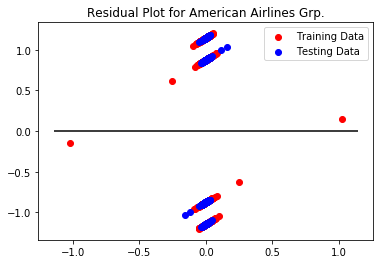

In [41]:
plt.scatter(model_A1G.predict(X_train_scaled), model_A1G.predict(X_train_scaled) - y_train_scaled, c="red", label="Training Data")
plt.scatter(model_A1G.predict(X_test_scaled), model_A1G.predict(X_test_scaled) - y_test_scaled, c="blue", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot for American Airlines Grp.")
plt.show()


### Quantifying A1G

In [44]:
predictions = model_A1G.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model_A1G.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.9784881520655557, R2: -0.023978428829143247


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [80]:
BA_X = BA_encoded["Future_Change"].values.reshape(-1, 1)
BA_y = BA_encoded["pos"].values.reshape(-1, 1)
print(BA_X.shape,BA_y.shape)

(499, 1) (499, 1)


Text(0, 0.5, 'Positive Tweet')

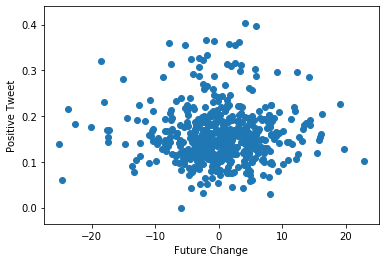

In [81]:
plt.scatter(BA_X, BA_y)
plt.xlabel("Future Change")
plt.ylabel("Positive Tweet")

In [82]:
CSX_X = CSX_encoded["Future_Change"].values.reshape(-1, 1)
CSX_y = CSX_encoded["pos"].values.reshape(-1, 1)
print(CSX_X.shape,CSX_y.shape)

(499, 1) (499, 1)


Text(0, 0.5, 'Positive Tweet')

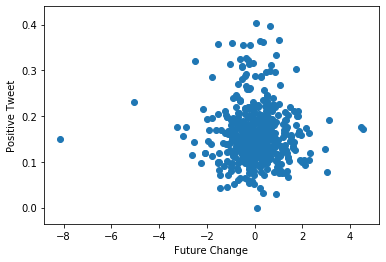

In [83]:
plt.scatter(CSX_X, CSX_y)
plt.xlabel("Future Change")
plt.ylabel("Positive Tweet")

In [84]:
GM_X = GM_encoded['Future_Change'].values.reshape(-1,1)
GM_y = GM_encoded['neg'].values.reshape(-1,1)
print(GM_X.shape,GM_y.shape)

(499, 1) (499, 1)


Text(0, 0.5, 'Negative Tweet')

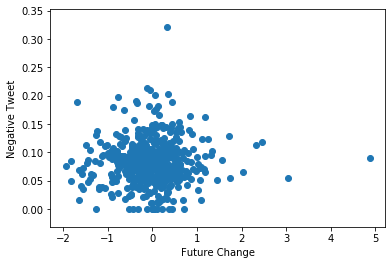

In [85]:
plt.scatter(GM_X,GM_y)
plt.xlabel("Future Change")
plt.ylabel("Negative Tweet")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(GM_X, GM_y)
myModel1 = LinearRegression()

In [ ]:
myModel1.fit(X_train,y_train)

In [ ]:
predicted = myModel1.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

In [ ]:
myModel1.score(X_test, y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(A1G_X, A1G_y)
myModel2 = LinearRegression()

In [ ]:
myModel2.fit(X_train,y_train)

In [ ]:
predicted = myModel2.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

In [ ]:
myModel2.score(X_test, y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(BA_X, BA_y)
myModel3 = LinearRegression()

In [ ]:
myModel3.fit(X_train,y_train)

In [ ]:
predicted = myModel3.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

In [ ]:
myModel3.score(X_test, y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(CSX_X, CSX_y)
myModel4 = LinearRegression()

In [ ]:
myModel4.fit(X_train,y_train)

In [ ]:
predicted = myModel4.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

In [ ]:
myModel4.score(X_test, y_test)